In [21]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

import sys
sys.path.append('../../m1epma')
sys.path.append('m1epma')
import physics
import experiment
from physics import keV, nano
import optimization
import m1model
import pickle

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.rc('axes', titlesize='small')     # fontsize of the axes title
plt.rc('axes', labelsize='small')    # fontsize of the x and y labels
plt.rc('legend', fontsize='small')    # legend fontsize


In [22]:
elements = [physics.Copper(), physics.Manganese()]
x_rays = [physics.XRay(e, 1.) for e in elements]

In [23]:

material = physics.Material(
    n_x = 10,
    n_y = 10,
    hat_n_x = 160,
    hat_n_y = 120,
    dim_x = [0., 1000.*nano],
    dim_y = [-800.*nano, 0.]
)

detector = physics.Detector(
    x=500.*nano,
    y=50.*nano,
    material = material)

electron_beam = physics.ElectronBeam(
        size=[(30.*nano)**2, (30.*nano)**2],
        pos=[500.*nano, -100.*nano],
        beam_energy_keV=12.,
        energy_variation_keV=0.1
    )

exp = experiment.Experiment(
        material=material,
        detector=detector,
        electron_beam=electron_beam,
        elements=elements,
        x_ray_transitions=x_rays,
        epsilon_initial_keV=13.,
        epsilon_cutoff_keV=5.,
        n_epsilon=170
    )

n_x_ray_transitions = exp.n_x_ray_transitions

# generate the measured k-ratios
true_parameters = np.array(
    [
        [0.78, 0.72, 0.71, 0.65, 0.2 , 0.09, 0.97, 0.17, 0.62, 0.85],
        [0.03, 0.16, 0.78, 0.28, 0.23, 0.45, 0.09, 0.06, 0.97, 0.67],
        [0.6 , 0.49, 0.09, 0.48, 0.07, 0.27, 0.76, 0.95, 0.03, 0.09],
        [0.96, 0.64, 0.4 , 0.26, 0.8 , 0.93, 0.19, 0.9 , 0.87, 0.08],
        [0.16, 0.9 , 0.5 , 0.83, 0.62, 0.41, 0.19, 0.32, 0.61, 0.36],
        [0.62, 0.75, 0.47, 0.61, 0.68, 0.65, 0.98, 0.35, 0.14, 0.94],
        [0.72, 0.78, 0.96, 0.44, 0.03, 0.66, 0.16, 0.56, 0.72, 0.21],
        [0.  , 0.38, 0.86, 0.55, 0.21, 0.66, 0.49, 0.44, 0.66, 0.11],
        [0.81, 0.19, 0.58, 0.8 , 0.63, 0.77, 0.82, 0.32, 0.97, 0.64],
        [0.48, 0.05, 0.16, 0.56, 0.49, 0.46, 0.58, 0.04, 0.84, 1.  ]
    ]
).reshape((material.n_x, material.n_y, 1))
n_parameters = material.n_x*material.n_y

In [24]:
mass_fractions = experiment.mass_fractions_from_parameters(exp.material.n_x, exp.material.n_y, true_parameters)
m1model_data = m1model.solve_forward(exp, mass_fractions)
#m1model_data['material'] = e.material
#m1model_data['beam'] = e.electron_beam
#m1model_data['detector'] = e.detector
#m1model_data['energies_keV'] = e.epsilons_keV
#with open('m1model_plots.pkl', 'wb') as writefile:
#    pickle.dump(m1model_data, writefile)

calculating forward solution


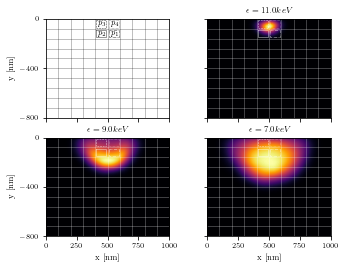

In [25]:
fig, ax = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(5.3, 4))
ax = ax.flatten()
q = m1model_data['solution']
m = material
eps = exp.epsilons_keV
indices = [127, 85, 43]
    #vmin = np.min(q[indices, 0, :, :])
    #vmax = np.max(q[indices, 0, :, :])
ax[0].imshow(np.ones(np.shape(q[indices[0], 0, :, :].T)), vmin = 0, vmax = 1, origin='lower', extent=[m.dim_x[0]/nano, m.dim_x[1]/nano, m.dim_y[0]/nano, m.dim_y[1]/nano], cmap='gray')

for i, idx in enumerate(indices):
    i = i + 1
    im = ax[i].imshow(q[idx, 0, :, :].T, origin='lower', extent=[m.dim_x[0]/nano, m.dim_x[1]/nano, m.dim_y[0]/nano, m.dim_y[1]/nano], cmap='inferno')
    ax[i].title.set_text("$\\epsilon = {} keV$".format(round(eps[idx], 1)))
    ax[i].set_yticks([0, -400, -800])
    if i == 2 or i == 3:
        ax[i].set_xlabel("x [nm]")
    ax[i].set_aspect("equal", "box")
# ax[0].set_xticks([])
# ax[1].set_xticks([])
ax[0].set_ylabel("y [nm]")
ax[2].set_ylabel("y [nm]")
for i in range(4):
    if i == 0:
        col = "black"
    else:
        col = "white"
    for y in np.linspace(0, -800, 11)[1:-1]:
        ax[i].axhline(y, color=col, linewidth=0.5, alpha=0.5)
    for x in np.linspace(0, 1000, 11)[1: -1]:
        ax[i].axvline(x, color=col, linewidth=0.5, alpha=0.5)
    ax[i].plot([410, 410, 490, 490, 4f10], [-10, -70, -70, -10, -10], color=col, linestyle="dashed", linewidth=0.5, alpha=0.8)
    ax[i].plot([410, 410, 490, 490, 410], [-90, -150, -150, -90, -90], color=col, linestyle="solid", linewidth=0.5, alpha=0.8)
    ax[i].plot([510, 510, 590, 590, 510], [-10, -70, -70, -10, -10], color=col, linestyle="dotted", linewidth=0.5, alpha=0.8)
    ax[i].plot([510, 510, 590, 590, 510], [-90, -150, -150, -90, -90], color=col, linestyle="dashdot", linewidth=0.5, alpha=0.8)
ax[0].text(450, -40, "$p_3$", horizontalalignment='center', verticalalignment='center', fontsize=8)
ax[0].text(550, -40, "$p_4$", horizontalalignment='center', verticalalignment='center', fontsize=8)
ax[0].text(450, -120, "$p_2$", horizontalalignment='center', verticalalignment='center', fontsize=8)
ax[0].text(550, -120, "$p_1$", horizontalalignment='center', verticalalignment='center', fontsize=8)
# fig.colorbar(im, ax=ax.ravel().tolist())
# cbar = fig.colorbar(im, ax=ax.ravel().tolist(), use_gridspec=True)

# plt.show()
plt.savefig("m1model_plots.pdf", bbox_inches='tight')
